# *** THIS PROJECT IS A COLLABORATION BETWEEN BLESSING NWOGU, DIANA CASTILLO, GILA KOHANBASH, AND RACHEL FINLEY ***

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble

In [41]:
import matplotlib.pyplot as plt

In [47]:
train_df = pd.read_csv('checkpoint_train.csv', encoding = 'utf-8')
test_df = pd.read_csv('checkpoint_test.csv', encoding = 'utf-8')

In [48]:
test_df.head(1)

,userId,movieId,budget,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,all_keywords
0,469,2124,15652992.07,Uncle Fester has been missing for 25 years An ...,8.46,1991,31950070.07,99,Weird Is Relative,The Addams Family,6.7,109,dead wish vampire black humor uncle eccentric ...


In [49]:
text_columns = ['overview', 'tagline', 'title', 'all_keywords']
train_df.drop(columns = text_columns, inplace = True)
test_df.drop(columns = text_columns, inplace = True)

In [50]:
## Not needed rn, but v useful code

fill_mean = lambda col: col.fillna(col.mean())
train_df = train_df.apply(fill_mean, axis = 0)
train_df = train_df.apply(fill_mean, axis = 0)


In [51]:
train_df.fillna(value = 0, inplace = True)
test_df.fillna(value = 0, inplace = True)

In [52]:
y_train = train_df['rating']
X_train = train_df.drop(labels = 'rating', axis = 1)

X_test = test_df

parameters = {
    "n_estimators": 960,
    "max_depth": 4,
    "min_samples_split": 15,
    "random_state": 150,
    'subsample': 0.75,
    "learning_rate": 0.2,
    "loss": "squared_error"

}
GB_regressor = ensemble.GradientBoostingRegressor(**parameters)
GB_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_split=15,
                          n_estimators=960, random_state=150, subsample=0.75)

In [53]:
test_df['rating'] = (GB_regressor.predict(X_test))
test_df['movieId'] = test_df['movieId'].astype(int).astype(str)
test_df['userId'] = test_df['userId'].astype(int).astype(str)
test_df['userId_movieId'] = test_df['userId'] + '_' + test_df['movieId']
cols = ['userId_movieId', 'rating']
test_df = test_df[cols]

In [54]:
test_df.to_csv('submission.csv', index = False)

Best Model RSME Score: 0.1735

#### Check Feature importance

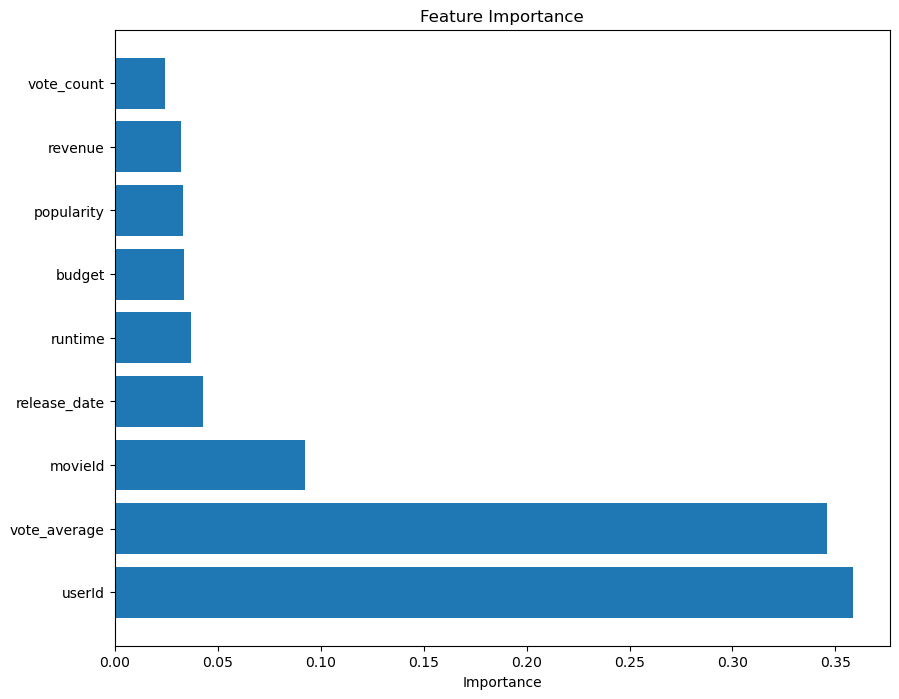

In [55]:
# Get feature importances and corresponding feature names
feature_importances = GB_regressor.feature_importances_

feature_names = list(train_df.drop(columns = 'rating' ).columns)

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize = (10, 8))
plt.barh(y = sorted_features, width = sorted_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## Other Models

### RF Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [14]:
train_df = pd.read_csv('checkpoint_train.csv', encoding = 'utf-8')
test_df = pd.read_csv('checkpoint_test.csv', encoding = 'utf-8')

In [15]:
text_columns = ['overview', 'tagline', 'title', 'all_keywords', 'part_of_collection']
train_df.drop(columns = text_columns, inplace = True)
test_df.drop(columns = text_columns, inplace = True)

In [16]:
train_df.fillna(value = 0, inplace = True)
test_df.fillna(value = 0, inplace = True)

In [17]:
y_train = train_df['rating']
X_train = train_df.drop(labels = 'rating', axis = 1)

X_test = test_df

In [24]:
rf_parameters = {
    'random_state': 150,
    'n_estimators': 500,
    'max_depth': 10
}

In [25]:
RF_regressor = RandomForestRegressor(**rf_parameters)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=150)

In [26]:
test_df['rating'] = (RF_regressor.predict(X_test))
test_df['movieId'] = test_df['movieId'].astype(int).astype(str)
test_df['userId'] = test_df['userId'].astype(int).astype(str)
test_df['userId_movieId'] = test_df['userId'] + '_' + test_df['movieId']
cols = ['userId_movieId', 'rating']
test_df = test_df[cols]

In [27]:
test_df.to_csv('submission.csv', index = False)

Model RSME Score: 0.1888

### TFIDF -> Truncated SVD -> Ridge Regression

In [74]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge

In [78]:
train_df = pd.read_csv('checkpoint_train.csv', encoding = 'utf-8')
test_df = pd.read_csv('checkpoint_test.csv', encoding = 'utf-8')

In [66]:
text_columns = ['overview', 'tagline', 'title', 'all_keywords', 'part_of_collection']
numerical_columns = ['userId', 'movieId', 'release_date', 'budget', 'popularity', 'revenue', 
                     'runtime', 'vote_average', 'vote_count', 'old', 
                     'Science Fiction', 'Crime', 'Thriller', 'Drama', 
                     'Horror', 'Romance', 'TV Movie', 'Action', 
                     'Adventure', 'War', 'Documentary', 'Family', 
                     'Fantasy', 'Music', 'Animation', 'Mystery', 
                     'Comedy', 'Western', 'Foreign', 'History']

In [67]:
train_df.drop(columns = numerical_columns, inplace = True)
test_df.drop(columns = numerical_columns, inplace = True)

In [68]:
train_df = train_df.fillna('').astype(str)
test_df = test_df.fillna('').astype(str)

In [69]:
train_df['corpus'] = train_df['overview'] + "_" + train_df['tagline'] + "_" + train_df['title'] + "_" + train_df['all_keywords'] + "_" + train_df['part_of_collection']
test_df['corpus'] = test_df['overview'] + "_" + test_df['tagline'] + "_" + test_df['title'] + "_" + test_df['all_keywords'] + "_" + test_df['part_of_collection']

In [70]:
# train_df['corpus'] = train_df['corpus'].fillna('').astype(str)
# test_df['corpus'] = test_df['corpus'].fillna('').astype(str)

In [71]:
vectorizer = TfidfVectorizer()
vectorizer.fit(train_df['corpus'])
train_tfidf_matrix = vectorizer.transform(train_df['corpus'])
test_tfidf_matrix = vectorizer.transform(test_df['corpus'])

In [72]:
svd_model = TruncatedSVD(n_components = 2)
svd_matrix_train = svd_model.fit_transform(train_tfidf_matrix)
svd_matrix_test = svd_model.fit_transform(test_tfidf_matrix)

In [76]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(svd_matrix_train, train_df['rating'])

Ridge()

In [79]:
test_df['rating'] = (ridge_model.predict(svd_matrix_test))
test_df['movieId'] = test_df['movieId'].astype(int).astype(str)
test_df['userId'] = test_df['userId'].astype(int).astype(str)
test_df['userId_movieId'] = test_df['userId'] + '_' + test_df['movieId']
cols = ['userId_movieId', 'rating']
test_df = test_df[cols]

In [80]:
test_df.to_csv('submission.csv', index = False)

Model RSME Score: 0.2141

### (TFIDF -> Truncated SVD) + Numerical Data -> GB Regressor

In [4]:
import numpy as np 
import pandas as pd 

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble

In [103]:
train_df = pd.read_csv('checkpoint_train.csv', encoding = 'utf-8')
test_df = pd.read_csv('checkpoint_test.csv', encoding = 'utf-8')

In [104]:
text_columns = ['overview', 'tagline', 'title', 'all_keywords', 'part_of_collection']
train_num = train_df.drop(columns = text_columns)
test_num = test_df.drop(columns = text_columns)

In [105]:
train_num.fillna(value = 0, inplace = True)
test_num.fillna(value = 0, inplace = True)

In [106]:
train_txt = train_df.drop(columns = numerical_columns)
test_txt = test_df.drop(columns = numerical_columns)

In [107]:
train_txt = train_txt.fillna('').astype(str)
test_txt = test_txt.fillna('').astype(str)

In [108]:
train_txt['corpus'] = train_txt['overview'] + "_" + train_txt['tagline'] + "_" + train_txt['title'] + "_" + train_txt['all_keywords'] + "_" + train_txt['part_of_collection']
test_txt['corpus'] = test_txt['overview'] + "_" + test_txt['tagline'] + "_" + test_txt['title'] + "_" + test_txt['all_keywords'] + "_" + test_txt['part_of_collection']

In [94]:
vectorizer = TfidfVectorizer()
vectorizer.fit(train_txt['corpus'])
train_tfidf_matrix = vectorizer.transform(train_txt['corpus'])
test_tfidf_matrix = vectorizer.transform(test_txt['corpus'])

In [95]:
svd_model = TruncatedSVD(n_components = 7)
svd_matrix_train = svd_model.fit_transform(train_tfidf_matrix)
svd_matrix_test = svd_model.fit_transform(test_tfidf_matrix)

In [100]:
type(svd_matrix_test)

numpy.ndarray

In [112]:
train_df = pd.merge(train_num, pd.DataFrame(svd_matrix_train), left_index=True, right_index=True)
test_df = pd.merge(test_num, pd.DataFrame(svd_matrix_test), left_index=True, right_index=True)

In [114]:
train_df.head()

,rating,userId,movieId,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,...,Family,Comedy,Horror,War,Foreign,Animation,Action,Adventure,0,1
0,0.4,10.0,1358.0,1.000000e+06,8.457968,1996.0,2.444412e+07,135.0,7.4,109.0,...,0,0,0,0,0,0,0,0,0.191172,-0.024328
1,0.7,237.0,1544.0,1.565299e+07,0.788123,1997.0,3.195007e+07,129.0,6.2,109.0,...,0,0,0,0,0,0,0,0,0.085781,0.002381
2,1.0,54.0,373.0,8.000000e+06,5.137903,1993.0,2.000000e+06,98.0,6.4,71.0,...,0,0,0,0,0,0,0,0,0.196126,-0.044103
3,0.8,11.0,2053.0,1.565299e+07,8.457968,1992.0,3.195007e+07,89.0,4.8,109.0,...,0,1,0,0,0,0,0,0,0.213956,-0.048535
4,0.6,183.0,2524.0,1.400000e+07,7.469056,1974.0,3.195007e+07,137.0,7.1,109.0,...,0,0,0,0,0,0,0,0,0.126701,0.017401


In [118]:
y_train = train_df['rating']
X_train = train_df.drop(labels = 'rating', axis = 1)

X_test = test_df

parameters = {
    "n_estimators": 960,
    "max_depth": 4,
    "min_samples_split": 15,
    "random_state": 150,
    'subsample': 0.75,
    "learning_rate": 0.2,
    "loss": "squared_error"

}
GB_regressor = GradientBoostingRegressor(**parameters)
GB_regressor.fit(X_train, y_train)

C:\Users\rache\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_split=15,
                          n_estimators=960, random_state=150, subsample=0.75)

In [119]:
test_df['rating'] = (GB_regressor.predict(X_test))
test_df['movieId'] = test_df['movieId'].astype(int).astype(str)
test_df['userId'] = test_df['userId'].astype(int).astype(str)
test_df['userId_movieId'] = test_df['userId'] + '_' + test_df['movieId']
cols = ['userId_movieId', 'rating']
test_df = test_df[cols]

C:\Users\rache\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [120]:
test_df.to_csv('submission.csv', index = False)

Model RSME Score: 0.1758

### (TFIDF -> Truncated SVD) + Numerical Data -> RF Regressor

In [4]:
import numpy as np 
import pandas as pd 

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble

In [103]:
train_df = pd.read_csv('checkpoint_train.csv', encoding = 'utf-8')
test_df = pd.read_csv('checkpoint_test.csv', encoding = 'utf-8')

In [104]:
text_columns = ['overview', 'tagline', 'title', 'all_keywords', 'part_of_collection']
train_num = train_df.drop(columns = text_columns)
test_num = test_df.drop(columns = text_columns)

In [105]:
train_num.fillna(value = 0, inplace = True)
test_num.fillna(value = 0, inplace = True)

In [106]:
train_txt = train_df.drop(columns = numerical_columns)
test_txt = test_df.drop(columns = numerical_columns)

In [107]:
train_txt = train_txt.fillna('').astype(str)
test_txt = test_txt.fillna('').astype(str)

In [108]:
train_txt['corpus'] = train_txt['overview'] + "_" + train_txt['tagline'] + "_" + train_txt['title'] + "_" + train_txt['all_keywords'] + "_" + train_txt['part_of_collection']
test_txt['corpus'] = test_txt['overview'] + "_" + test_txt['tagline'] + "_" + test_txt['title'] + "_" + test_txt['all_keywords'] + "_" + test_txt['part_of_collection']

In [94]:
vectorizer = TfidfVectorizer()
vectorizer.fit(train_txt['corpus'])
train_tfidf_matrix = vectorizer.transform(train_txt['corpus'])
test_tfidf_matrix = vectorizer.transform(test_txt['corpus'])

In [95]:
svd_model = TruncatedSVD(n_components=2)
svd_matrix_train = svd_model.fit_transform(train_tfidf_matrix)
svd_matrix_test = svd_model.fit_transform(test_tfidf_matrix)

In [100]:
type(svd_matrix_test)

numpy.ndarray

In [112]:
train_df = pd.merge(train_num, pd.DataFrame(svd_matrix_train), left_index=True, right_index=True)
test_df = pd.merge(test_num, pd.DataFrame(svd_matrix_test), left_index=True, right_index=True)

In [114]:
train_df.head()

,rating,userId,movieId,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,...,Family,Comedy,Horror,War,Foreign,Animation,Action,Adventure,0,1
0,0.4,10.0,1358.0,1.000000e+06,8.457968,1996.0,2.444412e+07,135.0,7.4,109.0,...,0,0,0,0,0,0,0,0,0.191172,-0.024328
1,0.7,237.0,1544.0,1.565299e+07,0.788123,1997.0,3.195007e+07,129.0,6.2,109.0,...,0,0,0,0,0,0,0,0,0.085781,0.002381
2,1.0,54.0,373.0,8.000000e+06,5.137903,1993.0,2.000000e+06,98.0,6.4,71.0,...,0,0,0,0,0,0,0,0,0.196126,-0.044103
3,0.8,11.0,2053.0,1.565299e+07,8.457968,1992.0,3.195007e+07,89.0,4.8,109.0,...,0,1,0,0,0,0,0,0,0.213956,-0.048535
4,0.6,183.0,2524.0,1.400000e+07,7.469056,1974.0,3.195007e+07,137.0,7.1,109.0,...,0,0,0,0,0,0,0,0,0.126701,0.017401


In [118]:
y_train = train_df['rating']
X_train = train_df.drop(labels = 'rating', axis = 1)

X_test = test_df

parameters = {
    "n_estimators": 960,
    "max_depth": 4,
    "min_samples_split": 15,
    "random_state": 150,
    'subsample': 0.75,
    "learning_rate": 0.2,
    "loss": "squared_error"

}
GB_regressor = GradientBoostingRegressor(**parameters)
GB_regressor.fit(X_train, y_train)

C:\Users\rache\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_split=15,
                          n_estimators=960, random_state=150, subsample=0.75)

In [119]:
test_df['rating'] = (GB_regressor.predict(X_test))
test_df['movieId'] = test_df['movieId'].astype(int).astype(str)
test_df['userId'] = test_df['userId'].astype(int).astype(str)
test_df['userId_movieId'] = test_df['userId'] + '_' + test_df['movieId']
cols = ['userId_movieId', 'rating']
test_df = test_df[cols]

C:\Users\rache\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [120]:
test_df.to_csv('submission.csv', index = False)

#### JUST VOTE AVG

In [4]:
train_df = pd.read_csv('checkpoint_train.csv', encoding = 'utf-8')
test_df = pd.read_csv('checkpoint_test.csv', encoding = 'utf-8')

In [5]:
cols = ['userId', 'movieId', 'vote_average']

In [6]:
y_train = train_df['rating']
X_train = train_df[cols]

X_test = test_df[cols]

parameters = {
    "n_estimators": 960,
    "max_depth": 4,
    "min_samples_split": 15,
    "random_state": 150,
    'subsample': 0.75,
    "learning_rate": 0.2,
    "loss": "squared_error"

}
GB_regressor = ensemble.GradientBoostingRegressor(**parameters)
GB_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_split=15,
                          n_estimators=960, random_state=150, subsample=0.75)

In [7]:
test_df['rating'] = (GB_regressor.predict(X_test))
test_df['movieId'] = test_df['movieId'].astype(int).astype(str)
test_df['userId'] = test_df['userId'].astype(int).astype(str)
test_df['userId_movieId'] = test_df['userId'] + '_' + test_df['movieId']
cols = ['userId_movieId', 'rating']
test_df = test_df[cols]

In [8]:
test_df.to_csv('submission_just_voteavg_GBRegressor.csv', index = False)